In [1]:
# Week 3 Assignment - Submitted by Gary Gee
# For some reason prettyplot lines weren't working and I had to do the following:
# "pip install prettyplotlib   "
# To install the library functions for python related to that.
#
# a) For the 1st part of the notebook assignment:
#    I recreated the examples on "Part 2: data" and "Part 3: plotting"
#
# b) For the 2nd part of the notebook assignment in the"Visualizing the distribution of a dataset" section of the notebook,
# I looked at the following in terms of graphs from each of the subtopic sections: 
#
# Plotting univariate distributions:
#   The histogram plots.
#   -I added more with larger sample sizes and commented on rug plots and what was being shown with those.
#   -As the sample size increase (getting closer and closer to population size), the distribution was more 'normal' shaped.
#
# Plotting bivariate distributions:
#   -I added notes on the joint plot.
#   -I added information for the Hexbin plot
#
# Visualizing pairwise relationships in a dataset:
#   -I added my comments for both sets of plots (for both first pairplot and kdeplot)
#
# Visualizing linear relationships:
#   -I added comments for the first plot (scatter plot with regression line), I also commented
#   regarding the residual plots.
#
# Plotting with categorical data:
#   -I added comments for the last violin plot in the notebook and discussed what was happening and it's significance.
#




In [2]:
# Reload/Re-import everything needed

%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random  # I will need to use this to work with the UTC column (from the twitter_sample file)

## part 2: data

In the `data/` directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.

In [3]:
twitter_field_parser_string = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"

twitter_colnames = twitter_field_parser_string.split('|')

In [4]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
twitter_df = pd.read_csv('../data/twitter_sample.csv', sep='|', names=twitter_colnames)
twitter_df.tail(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [5]:
# next will clean up table
# print out columns before removing the ones called 'none'
print "Before drop."
print(twitter_df.columns)

# n.b.: this is an *in-place* delete -- unusual for a pandas structure
del twitter_df['None']

# I will rename None.4 as I will used this for future example re-writes for Week 3's assignment
twitter_df=twitter_df.rename(columns={'None.4':'CountryCode'})

# I will drop all other none columns
twitter_df.drop( [u"['None']",u'None.1', u'None.2', u'None.3', u'None.5', u'None.6', u'None.7', \
                  u'None.8', u'None.9', u'None.10',u'None.11', u'None.12', u'None.13',\
                  u'None.14', u'None.15', u'None.16'],1,inplace=True)
# I used the 'inplace=True' seting so didn't have to re-assign the df to something else.

# print out columns after removing the ones called 'none'
print "After drop."
print(twitter_df.columns)



Before drop.
Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCount', u'actor:friendsCount', u'actor:listedCount',
       u'actor:statusesCount', u'Tweet', u'None.14', u'None.15', u'None.16'],
      dtype='object')
After drop.
Index([u'id', u'postedTime', u'body', u'['twitter_entiteis:urls:url']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'CountryCode', u'actor:utcOffset', u'actor:displayName',
   

In [6]:
twitter_df

,id,postedTime,body,['twitter_entiteis:urls:url'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,CountryCode,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,['tr'],en,tr,None,None,TR,7200,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,US,-21600,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,JP,-36000,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,['en'],en,es,None,None,US,-14400,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,['ru'],en,ru,None,None,BY,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet
5,"tag:search.twitter.com,2005:351835317801730048",2013-07-01T22:50:51.000Z,I'm at Büyükçekmece Sahil w/ @emineetrk http:/...,['http://t.co/30BZ8dBzxL'],['tr'],en,tr,"[41.01520298, 28.59359264]",Point,TR,-18000,Özgür Ayı,curva1907,361352064,41,226,346,0,7759,Tweet
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,US,-28800,Mailari ♥,MailariMunoz,30740676,42,247,64,1,2438,Tweet
7,"tag:search.twitter.com,2005:351835318552506369",2013-07-01T22:50:51.000Z,Bağıra bağıra şarkı söylemek istiyoruum,None,['tr'],en,tr,"[40.8025861, 29.4308738]",Point,None,-18000,Yağmur,ygmreroglu,349059450,40,304,233,0,3558,Tweet
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,GB,0,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,US,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet


## slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [7]:
# Rewrting example to find values in data frame where the Tweet is a 'Reply' (instead of looking for 'en' as language)
twitter_df[twitter_df.Tweet =='Reply']



,id,postedTime,body,['twitter_entiteis:urls:url'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,CountryCode,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,US,-21600,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,['en'],en,es,None,None,US,-14400,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,GB,0,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply
10,"tag:search.twitter.com,2005:351835318044983298",2013-07-01T22:50:51.000Z,@DiegoSanRoman no y no me gusta.,None,['en'],en,es,"[19.34964, -99.19341]",Point,MX,-28800,Carlos Hermosillo,CHermosillo_FOX,1160945754,62,11873,69,56,1991,Reply
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,GB,-36000,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply
17,"tag:search.twitter.com,2005:351835318745436163",2013-07-01T22:50:51.000Z,@MiriamRC6 vooy pisando tan fuerte que voy dej...,None,['es'],en,es,"[41.9016077, -8.8703524]",Point,ES,7200,• LAURIS VERGARA ∞,LauurisVergara,526681547,33,231,216,1,11271,Reply
23,"tag:search.twitter.com,2005:351835318162427904",2013-07-01T22:50:51.000Z,@nazkoklu1 tamam mutlaka haber ver ben tum tem...,None,['en'],en,tr,None,None,TR,7200,Helin,helindundar,45421764,None,349,244,1,12236,Reply
31,"tag:search.twitter.com,2005:351835317898199040",2013-07-01T22:50:51.000Z,@Verity97 just kiddin u bootiful dis u &gt; 👰,None,['en'],en,en,"[53.54338422, -1.4962159]",Point,GB,None,beth field,_bethfieldx,601030480,31,112,239,0,526,Reply
35,"tag:search.twitter.com,2005:351835318112096256",2013-07-01T22:50:51.000Z,@jono1006 not this week dude il go out the wee...,None,['en'],en,en,"[52.55744511, -2.08298706]",Point,GB,0,Stefano,Stefan4LFC,231244313,36,153,300,0,3923,Reply
43,"tag:search.twitter.com,2005:351835318732857344",2013-07-01T22:50:51.000Z,@MaevaRmz Dakkor Moi jvai pas oublier j'espère...,None,['fr'],en,fr,"[48.9572585, 2.2946213]",Point,FR,None,SMILEY Négroo,miniBengalo,1270875637,40,116,122,0,3174,Reply


In [8]:
# I will practice with example to access a field with colon based name instead of dot-access
# and print the 'head' (top 5 rows) of data.  I will filter those with more than 2000 friendsCount

twitter_df[twitter_df["actor:friendsCount"] > 2000].head()  

,id,postedTime,body,['twitter_entiteis:urls:url'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,CountryCode,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet
19,"tag:search.twitter.com,2005:351835319085187072",2013-07-01T22:50:51.000Z,@Michael5SOS MIKEY I LOVE U,None,['it'],en,en,"[43.82758701, 12.99396517]",Point,IT,3600,meconio.,liamsfaith,382824235,44,5589,2200,17,51769,Tweet
25,"tag:search.twitter.com,2005:351835318682525697",2013-07-01T22:50:51.000Z,A Very Happy Great Gramma. #picoftheday #famil...,['http://t.co/DZk6HN22r1'],['en'],en,en,"[42.25865115, -83.20823908]",Point,US,-18000,Kristopher Alan,KristopherAlan,27737035,32,342,2001,0,468,Tweet
39,"tag:search.twitter.com,2005:351835318405705728",2013-07-01T22:50:51.000Z,El aburrimiento que llevo encima no es normal.,None,['es'],en,es,"[39.9356653, -0.0956062]",Point,ES,3600,Juli.,JuliaLlorens,162779089,40,3285,2106,30,31002,Tweet
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,['it'],it,it,"[41.73604, 12.2890263]",Point,IT,7200,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply


Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [9]:
# create new dataframe from numerical columns
# -> I will re-write example to use different numerical columns... so instead of:
# gnip:klout_score, actor:followersCount, actor:friendsCount, actor:listedCount
#.... I will use:  
# actor:utcOffset, actor:id, actor:statusesCount, actor:listedCount (re-use this again)
# 
twitter_df2 = twitter_df[["actor:utcOffset","actor:id", "actor:statusesCount", "actor:listedCount"]]

twitter_df2.head()

,actor:utcOffset,actor:id,actor:statusesCount,actor:listedCount
0,7200,248312738,2028,0
1,-21600,48025164,4071,0
2,-36000,217987801,3505,0
3,-14400,461188787,17636,1
4,None,1433828712,145,0


In [10]:
# output the data types for each field
twitter_df2.dtypes  

actor:utcOffset        object
actor:id                int64
actor:statusesCount     int64
actor:listedCount       int64
dtype: object

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [11]:
# Now for exampe re-write... I will re-write the floatify (and rename to gary_floatify) so that 
# it converts all values of the above into float and just for practice (just because it can be done)
# in cases where a number is '1'... I will have the value set as 33.3... and if number is 0 to be 22.22

# convert ints / strings to floats, give up on anything else (call it 0.0)
def gary_floatify(val):
    if val == 1: 
        return 33.3 
    elif val == 0: 
        return 22.2 
    elif val == None or val =='None':
        return 0.0
    else:
        return float(val)

In [12]:
# Now process the function on the actor:listedCount column and have it updated
twitter_df2['actor:listedCount'] = twitter_df2['actor:listedCount'].map(gary_floatify)

#df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)
# show the data table with after function run on column 'actor:listedCount'
twitter_df2.head(10)  # list the first 10 rows of the resulting table after my version of floatify ran

C:\Users\Gary\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,actor:utcOffset,actor:id,actor:statusesCount,actor:listedCount
0,7200,248312738,2028,22.2
1,-21600,48025164,4071,22.2
2,-36000,217987801,3505,22.2
3,-14400,461188787,17636,33.3
4,None,1433828712,145,22.2
5,-18000,361352064,7759,22.2
6,-28800,30740676,2438,33.3
7,-18000,349059450,3558,22.2
8,0,26568635,3116,22.2
9,None,541953037,4170,22.2


In [13]:
# I will use another function to 'fix' the utOffset so that it works with the future examples
# as the current data type is object... so need it to be in a numerical type will fix it to be 'INT' instead of 'object' type
def fixUTC(val):
    return random.randint(1,10)  

#This function will change the data type for the actor:utcOffset column to be int
twitter_df2['actor:utcOffset'] = twitter_df2['actor:utcOffset'].map(fixUTC)
twitter_df2.head(10)

C:\Users\Gary\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,actor:utcOffset,actor:id,actor:statusesCount,actor:listedCount
0,4,248312738,2028,22.2
1,10,48025164,4071,22.2
2,6,217987801,3505,22.2
3,3,461188787,17636,33.3
4,2,1433828712,145,22.2
5,4,361352064,7759,22.2
6,10,30740676,2438,33.3
7,10,349059450,3558,22.2
8,7,26568635,3116,22.2
9,4,541953037,4170,22.2


In [14]:
# print out the data type for table now
twitter_df2.dtypes

actor:utcOffset          int64
actor:id                 int64
actor:statusesCount      int64
actor:listedCount      float64
dtype: object

In [15]:
# Now with even the actor:UTC offset field as a numerical type (instead of 'object' type... I will convert all
# elements in twitter_df2 to be floats... as tjhis only works if the elements can all be converted to floats 
# (e.g. ints or something python can handle) 
twitter_df2 = twitter_df2.astype(float)

twitter_df2.dtypes



actor:utcOffset        float64
actor:id               float64
actor:statusesCount    float64
actor:listedCount      float64
dtype: object

Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [16]:
# with all the data elements in the table as numbers... do the same as in the original notebook and 
# I will add an extra column called 'CountRatio'... of which the result will be statusesCount/listedCount

twitter_df2['CountRatio'] = (twitter_df2['actor:statusesCount'] / twitter_df2['actor:listedCount'])

twitter_df2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#twitter_df2.describe()

,actor:utcOffset,actor:id,actor:statusesCount,actor:listedCount,CountRatio
0,4.0,2.483127e+08,2028.0,22.2,91.351351
1,10.0,4.802516e+07,4071.0,22.2,183.378378
2,6.0,2.179878e+08,3505.0,22.2,157.882883
3,3.0,4.611888e+08,17636.0,33.3,529.609610
4,2.0,1.433829e+09,145.0,22.2,6.531532


## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [17]:
# back to bigger df, without 'None' cols
twitter_df

,id,postedTime,body,['twitter_entiteis:urls:url'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,CountryCode,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,['tr'],en,tr,None,None,TR,7200,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,US,-21600,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,JP,-36000,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,['en'],en,es,None,None,US,-14400,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,['ru'],en,ru,None,None,BY,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet
5,"tag:search.twitter.com,2005:351835317801730048",2013-07-01T22:50:51.000Z,I'm at Büyükçekmece Sahil w/ @emineetrk http:/...,['http://t.co/30BZ8dBzxL'],['tr'],en,tr,"[41.01520298, 28.59359264]",Point,TR,-18000,Özgür Ayı,curva1907,361352064,41,226,346,0,7759,Tweet
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,US,-28800,Mailari ♥,MailariMunoz,30740676,42,247,64,1,2438,Tweet
7,"tag:search.twitter.com,2005:351835318552506369",2013-07-01T22:50:51.000Z,Bağıra bağıra şarkı söylemek istiyoruum,None,['tr'],en,tr,"[40.8025861, 29.4308738]",Point,None,-18000,Yağmur,ygmreroglu,349059450,40,304,233,0,3558,Tweet
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,GB,0,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,US,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet


Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [18]:
# For this example re-write... I will use data rows with klout scores 10 and above.
pop_twitter_df = twitter_df[twitter_df["gnip:klout_score"] > 10]


# fix the klout scores to remove None (and to mess up anything apply strange rule where anything 0 is 22.2 and 1 is 33.3)
pop_twitter_df ['gnip:klout_score'] = pop_twitter_df['gnip:klout_score'].map(gary_floatify)

# in case you need to remind yourself of the dataframe
pop_twitter_df.head()

# from the example notebook I will break up into multiple cells to review and show for my week 3 submission note book.
# use GroupBy methods for stats on each group... I used the "CountryCode" column (formerly None.4 column) as it looks 
# like some sort of country code - just to practice and to use a submission for Week #3's assignment.

pop_twitter_df.groupby("CountryCode").size()      # number of elements per group... 


CountryCode
BR      10
BY       1
CA       1
ES       7
FR       4
GB      11
ID       6
IT       3
JP       2
MX       5
MY       3
NL       2
NO       2
None     7
PT       1
RU       1
TR       3
US      26
dtype: int64

In [19]:
pop_twitter_df.groupby("CountryCode").sum()       # sum of elements in each group                                             


,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
CountryCode,,,,,,
BR,3106528206,396.0,4760,4395,0,137995
BY,1433828712,21.0,12,6,0,145
CA,1041817357,48.0,2037,1984,1,23240
ES,4165278256,260.0,6156,3659,58,106857
FR,4113153476,179.0,1468,886,9,33070
GB,3515388335,420.0,4042,4360,37,95592
ID,4096418256,238.0,1715,1302,1,38475
IT,2487120009,141.0,10737,6060,28,83804
JP,299315649,46.0,189,389,3,5656


In [20]:
pop_twitter_df.groupby("CountryCode").mean()      # algebraic mean of elements per group

,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
CountryCode,,,,,,
BR,3.106528e+08,39.600000,476.000000,439.500000,0.000000,13799.500000
BY,1.433829e+09,21.000000,12.000000,6.000000,0.000000,145.000000
CA,1.041817e+09,48.000000,2037.000000,1984.000000,1.000000,23240.000000
ES,5.950398e+08,37.142857,879.428571,522.714286,8.285714,15265.285714
FR,1.028288e+09,44.750000,367.000000,221.500000,2.250000,8267.500000
GB,3.195808e+08,38.181818,367.454545,396.363636,3.363636,8690.181818
ID,6.827364e+08,39.666667,285.833333,217.000000,0.166667,6412.500000
IT,8.290400e+08,47.000000,3579.000000,2020.000000,9.333333,27934.666667
JP,1.496578e+08,23.000000,94.500000,194.500000,1.500000,2828.000000


In [21]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
n4_gb=pop_twitter_df[['CountryCode',\
            'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('CountryCode')

# Reading the original example comments on head function  utput when you run on something with the group by... 
# it seems that it will list at most n data instances of the group by field. 

n4_gb.head(3)  # I will select three... so for the group by field... this will output up to 3 entries for a given group 
               # by grouping.

# see that they type is DataFrameGroupBy object
#lang_gb

,CountryCode,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,TR,35.0,178,129,2028
1,US,32.0,144,215,4071
2,JP,18.0,37,54,3505
3,US,50.0,438,174,17636
4,BY,21.0,12,6,145
5,TR,41.0,226,346,7759
6,US,42.0,247,64,2438
7,None,40.0,304,233,3558
8,GB,38.0,380,860,3116
10,MX,62.0,11873,69,1991


In [22]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
n4_gb_mean = n4_gb.aggregate(np.mean)  
n4_gb_mean.head()

# this will output the mean for all data points of each groupby data type.



,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
CountryCode,,,,
BR,39.600000,476.000000,439.500000,13799.500000
BY,21.000000,12.000000,6.000000,145.000000
CA,48.000000,2037.000000,1984.000000,23240.000000
ES,37.142857,879.428571,522.714286,15265.285714
FR,44.750000,367.000000,221.500000,8267.500000


In [23]:
# I will try some of the other aggregate functions instead of mean
# try min function.
n4_gb_min = n4_gb.aggregate(np.min)
n4_gb_min.head()


,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
CountryCode,,,,
BR,30.0,128,76,1419
BY,21.0,12,6,145
CA,48.0,2037,1984,23240
ES,27.0,45,155,303
FR,40.0,79,66,3174


In [24]:
# Now try max function.
n4_gb_max = n4_gb.aggregate(np.max)
n4_gb_max.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
CountryCode,,,,
BR,47.0,1248,1962,30559
BY,21.0,12,6,145
CA,48.0,2037,1984,23240
ES,46.0,3285,2106,60236
FR,53.0,1179,628,20141


In [25]:
# verify the single index
n4_gb_mean.index


Index([u'BR', u'BY', u'CA', u'ES', u'FR', u'GB', u'ID', u'IT', u'JP', u'MX',
       u'MY', u'NL', u'NO', u'None', u'PT', u'RU', u'TR', u'US'],
      dtype='object', name=u'CountryCode')

## part 3: plotting

As far as I can tell, plotting in Python was not fun in the past. Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

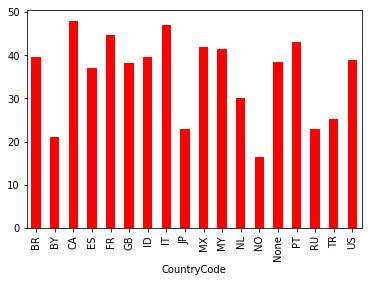

In [26]:
# Re-write example by plotting on klout_score with red colour
n4_gb_mean['gnip:klout_score'].plot(kind='bar', color='r')

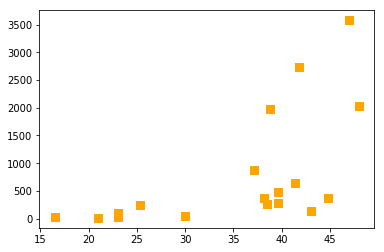

In [27]:
# Re do scatter plot exampe with klout_score and followersCount
# along with x,y variables changed, I set alpha to be 1 to make the 
# plot dot darker and instead of cirles I use orange squares

plt.scatter(x=n4_gb_mean['gnip:klout_score'],\
            y=n4_gb_mean['actor:followersCount'],\
            alpha=1,\
            s=50,\
            color='orange',\
            marker='s')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9170B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E1F9CC0>]], dtype=object)

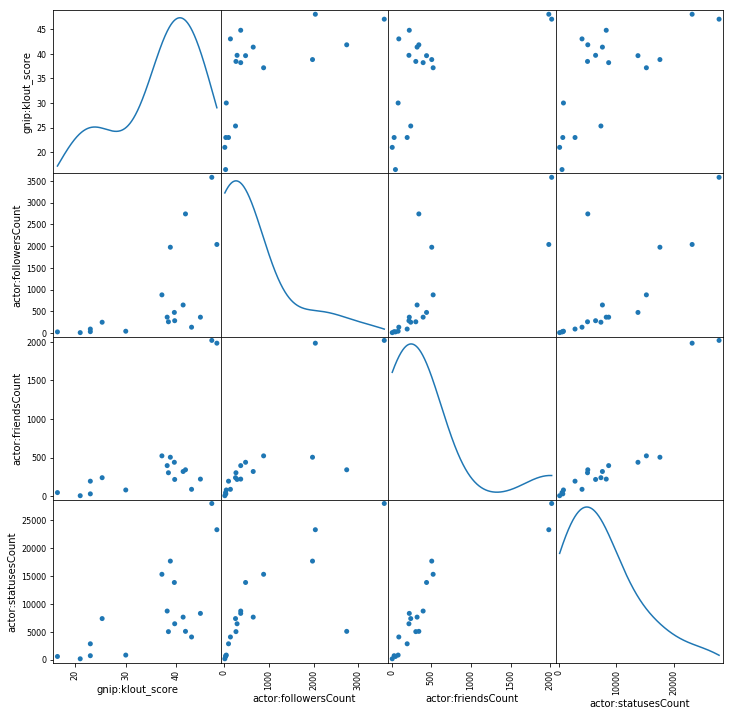

In [28]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

# modified this example for assignment to have alpha=1 so that plots
# are darker.

scatter_matrix(n4_gb_mean, alpha=1, figsize=(12,12), diagonal='kde', s=100)


Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [29]:
# make up some data with large-scale patterns and a datetime index
# For assignment let's make this for 3650 days starting on Jan 1st, 2017 
# (roughly) 10 years
year_data_df = pd.DataFrame(np.random.randn(3650, 4), \
                            index=pd.date_range('1/1/2017', periods=3650,\
                            columns=list('ABCD')))
year_data_df  = year_data_df .cumsum()
year_data_df.head()



,0,1,2,3
2017-01-01,-1.317559,1.117776,-0.236289,-0.195115
2017-01-02,-0.611869,2.192677,0.799521,0.471889
2017-01-03,1.504897,4.261456,-1.738043,-0.001655
2017-01-04,0.256532,4.873488,-2.594962,-0.601969
2017-01-05,0.541685,5.367662,-3.301767,-0.904209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000115925F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000115ACBE0>]], dtype=object)

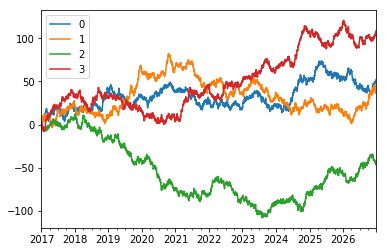

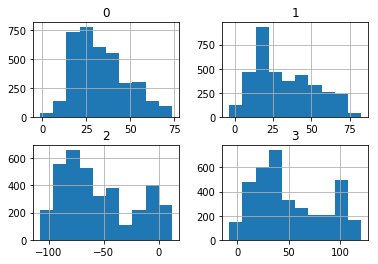

In [30]:
import prettyplotlib

year_data_df.plot()  # this does a line plot of the data in data frame year_data_df
year_data_df.hist()  # this does a histogram plot of the data in data frame year_data_df

In [31]:
# The above line plot is just a plot with X axis as the date and 
# y axis as the cummulative sum of the original table (which was originally
# populated with random numbers generated from a gaussian formula)
# Where each coloured trend line is for each of the columns of data
# Below the line graph are the four histograms, that represent the count of 
# instances for each random number that was generated for a 
# given column in the dataset.
# On of the things from the histo is that you can tell if a given
# column's trend line graph will be above 0 overall... but the overall
# amount of bins that have either positive or negative numbers.  As you know the frequency
# with which negative and positive numbers were encountered and their magnitude.

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:`categorical plots <categorical_tutorial>` chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [32]:
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns
sns.set(color_codes=True)

In [35]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the ***`distplot` function. By default, this will draw a `histogram <https://en.wikipedia.org/wiki/Histogram>`_ and fit a `kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>`_ (KDE). 

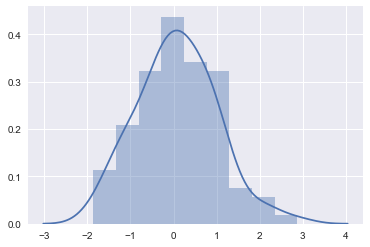

In [36]:
# I will user my own variable name and look at updating the sample size to look at 
# shape differences for graph as we vary sample size higher and higher.  
# As we go high in sample size... It should approach a standard distribution.
# So original histogram was based on sample size of 100
Hist_data = np.random.normal(size=100)
sns.distplot(Hist_data,color='b');

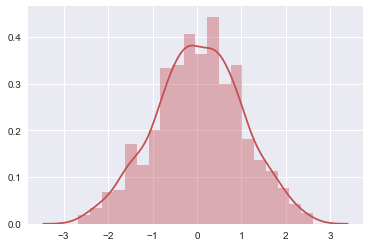

In [37]:
# Let's try doing it with size of 1000 with red colour
Hist_data = np.random.normal(size=1000)
sns.distplot(Hist_data,color='r');

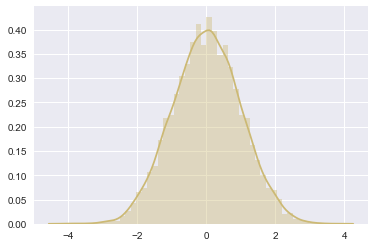

In [38]:
# Let's try doing it with size of 10000, with yellow colour
Hist_data = np.random.normal(size=10000)
sns.distplot(Hist_data,color='y');

**Histograms**

Histograms are likely familiar, and a **``hist``** function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the **`rugplot`** function, but it is also available in **`distplot`**:

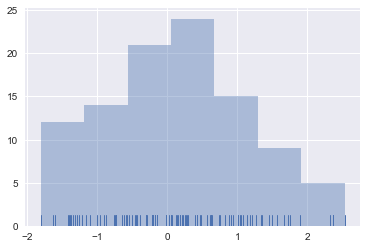

In [39]:
Hist_data = np.random.normal(size=100)
sns.distplot(Hist_data, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. **`distplot`** uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

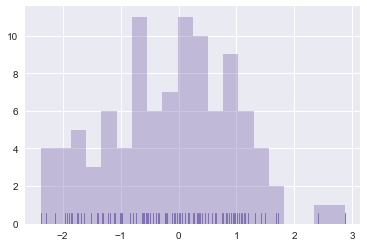

In [40]:
Hist_data = np.random.normal(size=100)
sns.distplot(Hist_data, bins=20, kde=False, rug=True,color='m');

In [41]:
# Basically histogram... coupled with a rug plot(which are the ticks on the x-axis - of actual data observations/values 
# within a bin)can show at a more granular level the values of data as the bins obscure individual data points as they may cover 
# a wide range of values.

**Kernel density estimaton**

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

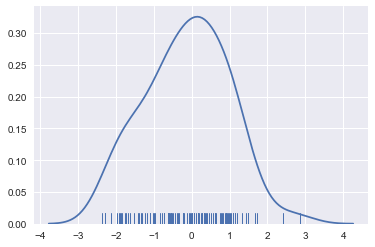

In [42]:
sns.distplot(Hist_data, hist=False, rug=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

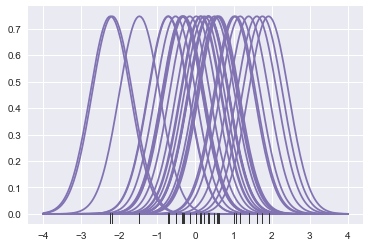

In [43]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)


kernels = []


for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)

    kernels.append(kernel)  
    plt.plot(support, kernel, color="m")
    

sns.rugplot(x, color=".2", linewidth=1);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

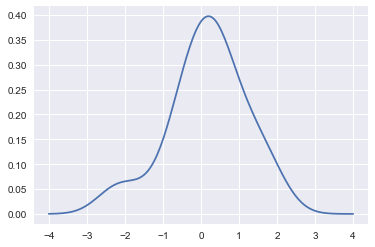

In [44]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

We can see that if we use the **`kdeplot`** function in seaborn, we get the same curve. This function is used by **`distplot`**, but it provides a more direct interface with easier access to other options when you just want the density estimate:

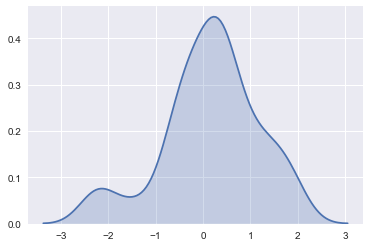

In [45]:
sns.kdeplot(x, shade=True);

The bandwidth (``bw``) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

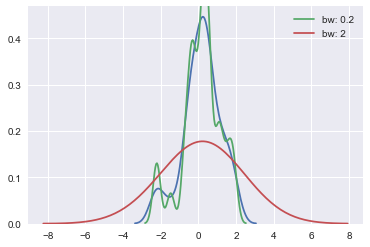

In [46]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter; however, this only influences how the curve is drawn and not how it is fit:

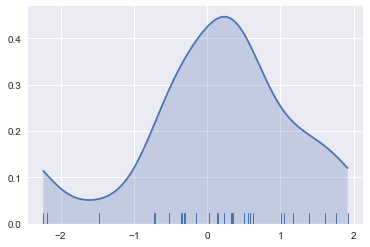

In [47]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

**Fitting parametric distributions**


You can also use **`distplot`** to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

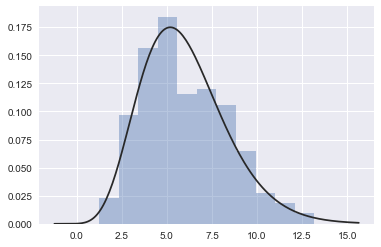

In [48]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the ***`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [49]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

**Scatterplots**


The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the *x* and *y* values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib **``plt.scatter``** function, and it is also the default kind of plot shown by the **`jointplot`** function:

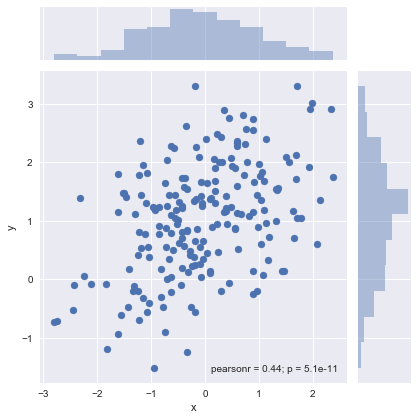

In [50]:
sns.jointplot(x="x", y="y", data=df);

In [51]:
# The joint plot is a combination of a scatter plot (two axis) 
# in the main part of the graph.  Then on each opposite side of each axis
# two historgrams (each) graphing the observations of the values
# of the axis.
#
# For whereever there are large bars in a given histogram, I know that 
# there will be more higher points(graph points) observations that 
# fall into that same co-ordinates and vice versa for the other co-ordinate.
# Where there are a cluster of points in this graph, we can infer that the 
# histo bars will be higher for the hist bars around that area of graph.


**Hexbin plots**

The bivariate analogue of a histogram is known as a **"hexbin"** plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib **``plt.hexbin``** function and as a style in **`jointplot`**. It looks best with a white background:

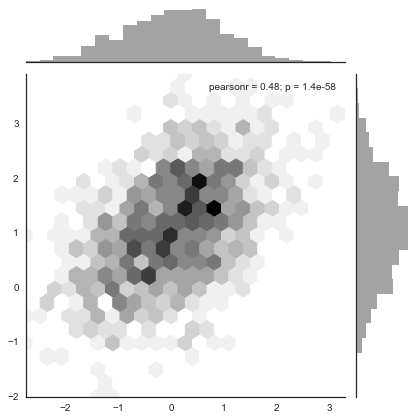

In [52]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

In [53]:
# For the hex bin plot this offers a more 3D view of the data
# in that you can get a feel for how many occurrences a scatter plot
# instance has occured in that if a scatter plot point has had multiple 
# observations that point can be coloured/shaded to represent a higher 
# count than that of other points on the graph to provide visual distinction
# that it has had a higher frequency in observation relative to other
# points in the graph.

**Kernel density estimation**


It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in **`jointplot`**:

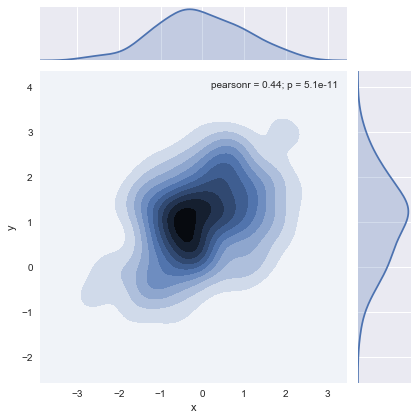

In [54]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

You can also draw a two-dimensional kernel density plot with the **`kdeplot`** function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the **`jointplot`** function manages its own figure:

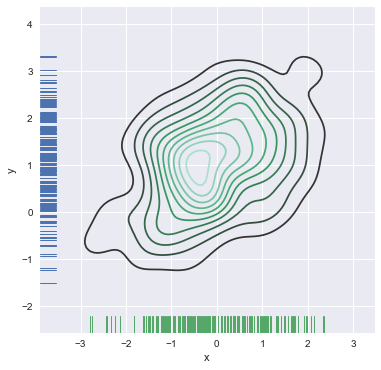

In [55]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

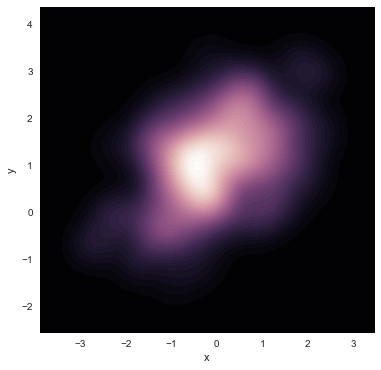

In [56]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

The **`jointplot`** function uses a **`JointGrid`** to manage the figure. For more flexibility, you may want to draw your figure by using **`JointGrid`** directly. **`jointplot` returns the **`JointGrid`** object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

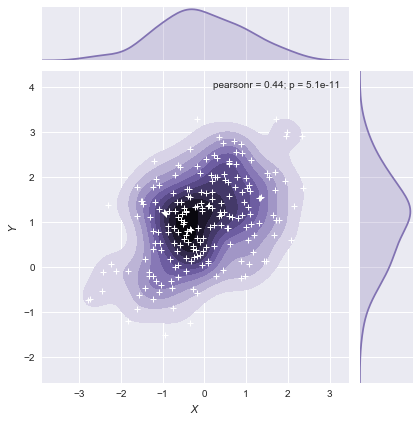

In [57]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can use the **`pairplot`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

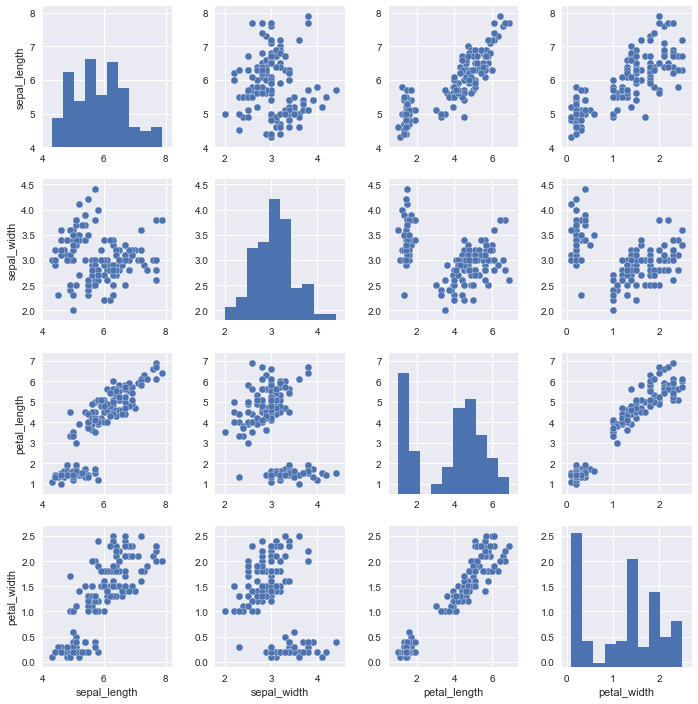

In [58]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Much like the relationship between **`jointplot`** and **`JointGrid`**, the **`pairplot`** function is built on top of a **`PairGrid`** object, which can be used directly for more flexibility:

C:\Users\Gary\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


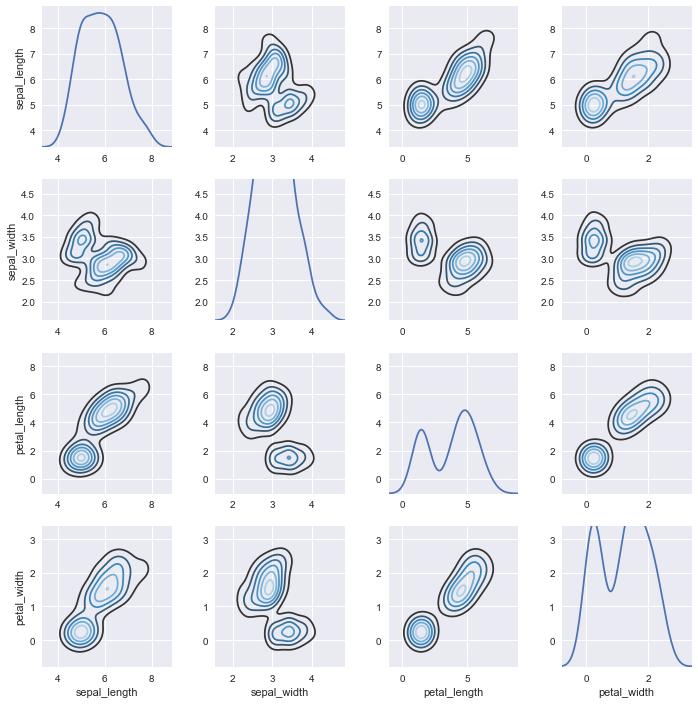

In [59]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [60]:
# For the above graphs, as there are multiple relationships in the 
# data set (ie since there are 4 numerical points of data for each sample), these graphs are to show the relationship of each 
# element of a data line to another.
# The first set of graphs (with 16 plots in it)... shows the relationship of each variable in a plot with another (in a scatter plot)
# and when the two facters are the same variable, the plot is a histogram.
#
# The second paired plots KDE functions over the IRIS data set for each pair of factors and points on the x,y axis
# of areas where the data observed (for the two factors) is dense (occurs frequently).
#

# Visualizing linear relationships

In [61]:
%matplotlib inline

In [62]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
import seaborn as sns
sns.set(color_codes=True)

In [64]:
np.random.seed(sum(map(ord, "regression")))

In [65]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, **`regplot`** and **`lmplot`** are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

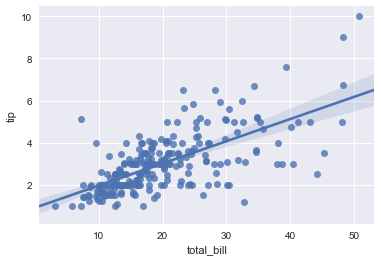

In [66]:
sns.regplot(x="total_bill", y="tip", data=tips);

In [67]:
# The above plot is a scatter plot of the total bill and the amount of tip paid ontop of the bill.
# The line in the middle is the regression line (the line of best fits) and the data set is loaded from the tips file
# on the seaborn github site.
# The regression line is an attempt to use a linear regression model (equation) to predict results.
#
# The regression line is based on the data set values and a calculation of the overal minimal average distance from
# each observation (data point).  The later examples show that depending on the data set, linear regression models
# are not the best as the numerical data be had in such a way that it only makes it numerically seem useful.  But in fact
# there are other types of regressions that can be used and even visual inspection of the data plot can highlight the 
# accuracy or whether or not a  linear regression line is suitable for use in the data.  Later on in this section
# it will be shown that there are even some plots (to show residual data) that can visually outline whether or not
# a linear regression model was appropriate to be used.  If the resulting residual plot had data points that are
# relatively random, that would mean the linear regression model was a good one.  If the residual plot's data points
# aren't randomized and have some sort of pattern or skew to them... that would be an indication that your linear model
# was not good or it's another model should be used entirely.

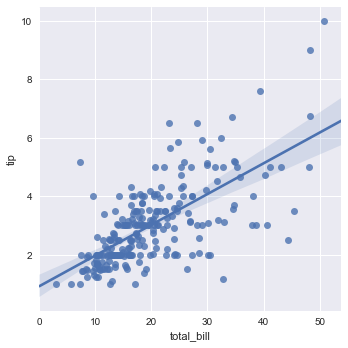

In [68]:
sns.lmplot(x="total_bill", y="tip", data=tips);

You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly. For now, the other main difference to know about is that **`regplot`** accepts the ``x`` and ``y`` variables in a variety of formats including simple numpy arrays, pandas ``Series`` objects, or as references to variables in a pandas ``DataFrame`` object passed to ``data``. In contrast, **`lmplot`** has ``data`` as a required parameter and the ``x`` and ``y`` variables must be specified as strings. This data format is called "long-form" or `"tidy" <http://vita.had.co.nz/papers/tidy-data.pdf>`_ data. Other than this input flexibility, **`regplot`** possesses a subset of **`lmplot`**'s features, so we will demonstrate them using the latter.

It's possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

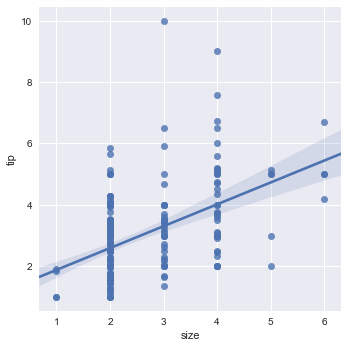

In [69]:
sns.lmplot(x="size", y="tip", data=tips);

One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

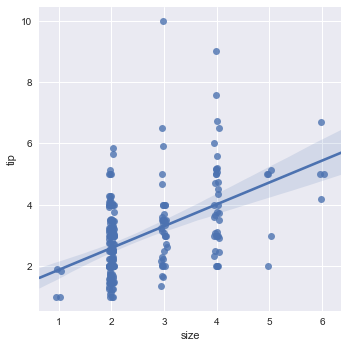

In [70]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

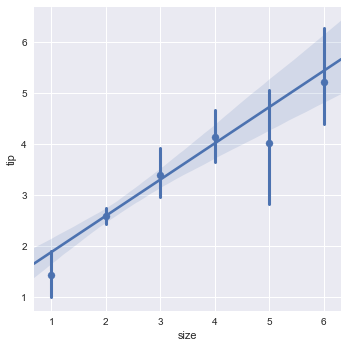

In [71]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The `Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>`_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [72]:
anscombe = sns.load_dataset("anscombe")

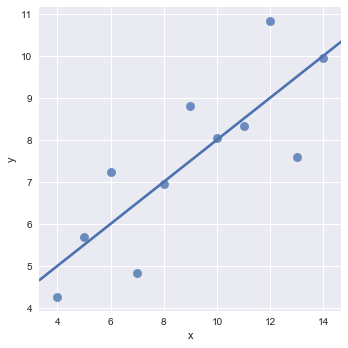

In [73]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

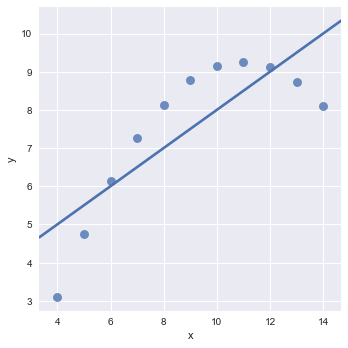

In [74]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

In the presence of these kind of higher-order relationships, **`lmplot`** and **`regplot`** can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

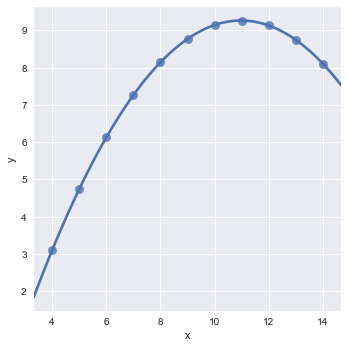

In [75]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:

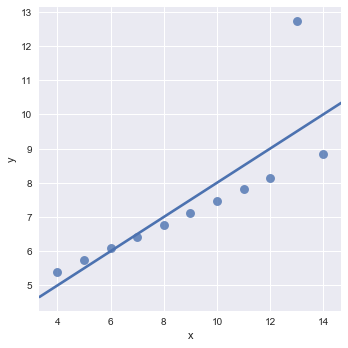

In [76]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

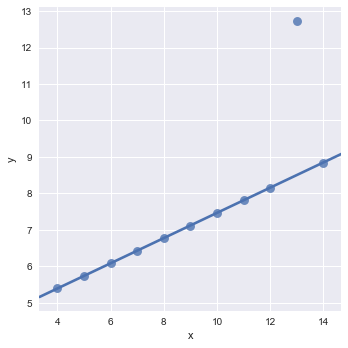

In [77]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

When the ``y`` variable is binary, simple linear regression also "works" but provides implausible predictions:

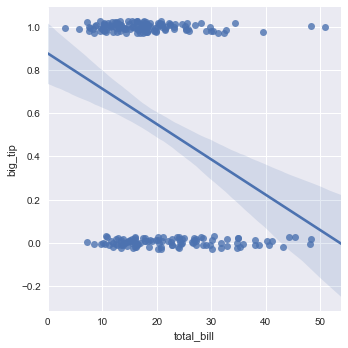

In [78]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of ``y = 1`` for a given value of ``x``:

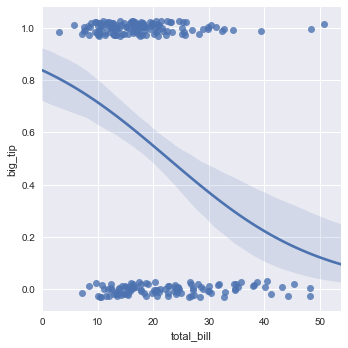

In [79]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ``ci=None``).

An altogether different approach is to fit a nonparametric regression using a `lowess smoother <https://en.wikipedia.org/wiki/Local_regression>`_. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

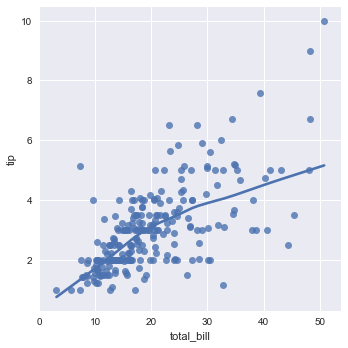

In [80]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

The **`residplot`** function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around ``y = 0``:

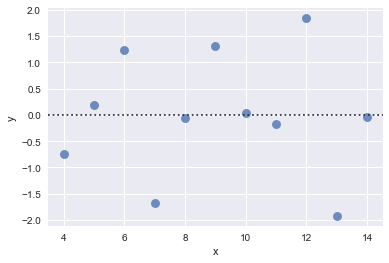

In [81]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

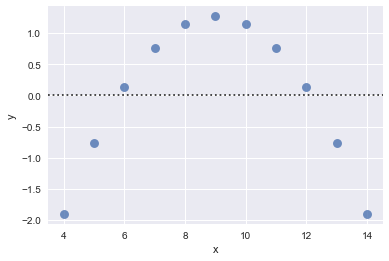

In [82]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference  between **`regplot`** and **`lmplot`** appears. While **`regplot`** always shows a single relationship, **`lmplot`** combines **`regplot`** with **`FacetGrid`** to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

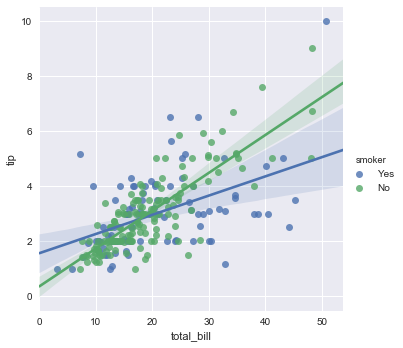

In [83]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to color, it's possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

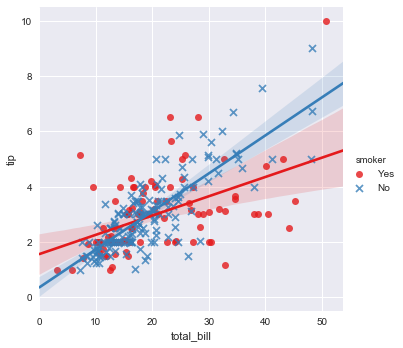

In [84]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

To add another variable, you can draw multiple "facets" which each level of the variable appearing in the rows or columns of the grid:

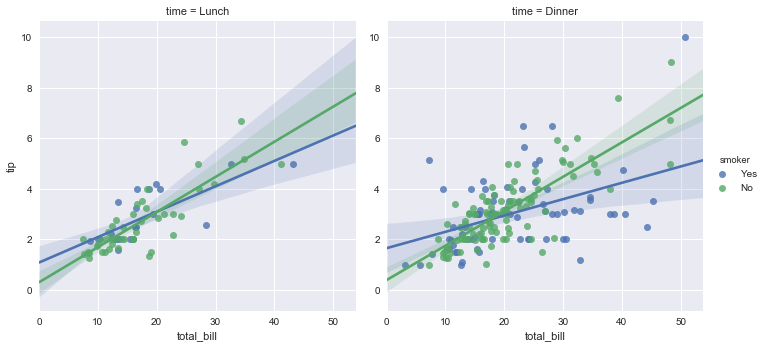

In [85]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

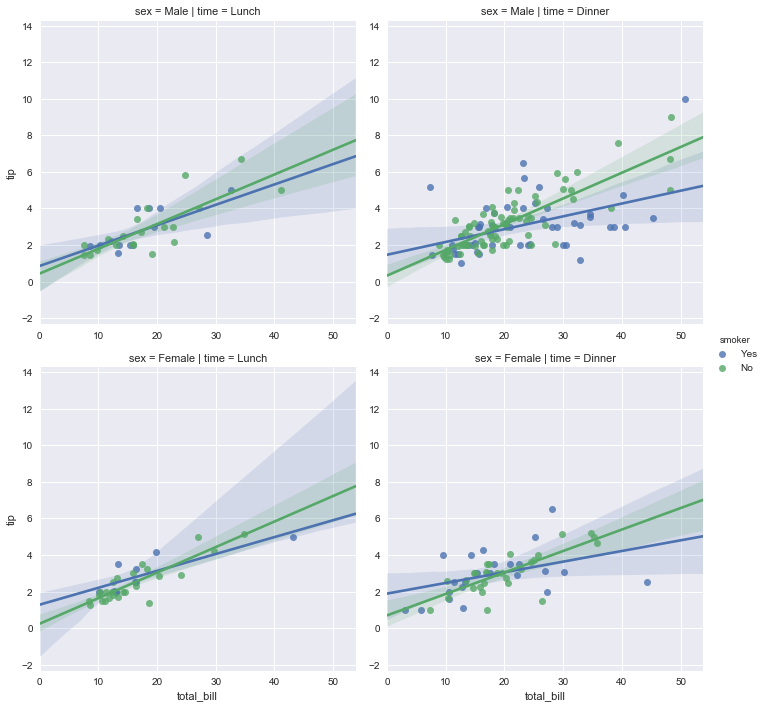

In [86]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

Controlling the size and shape of the plot
------------------------------------------

Before we noted that the default plots made by **`regplot`** and **`lmplot`** look the same but on axes that have a different size and shape. This is because **`regplot`** is an "axes-level" function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explictly provided, it simply uses the "currently active" axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

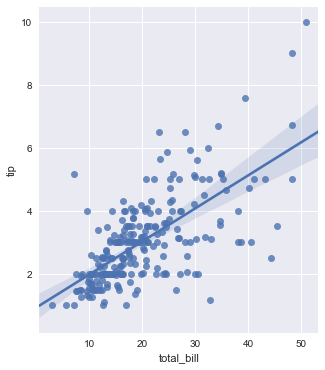

In [87]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

In contrast, the size and shape of the **`lmplot`** figure is controlled through the `FacetGrid` interface using the ``size`` and ``aspect`` parameters, which apply to each *facet* in the plot, not to the overall figure itself:

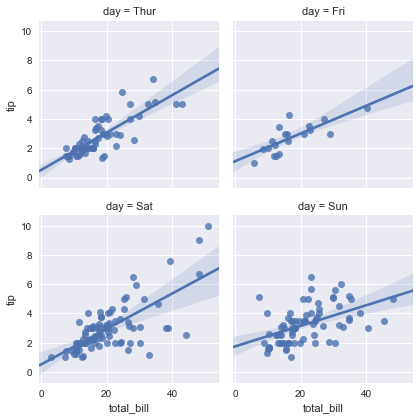

In [88]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

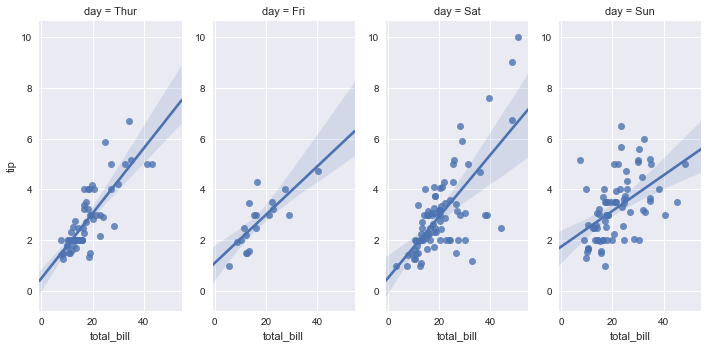

In [89]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

Plotting a regression in other contexts
---------------------------------------

A few other seaborn functions use **`regplot`** in the context of a larger, more complex plot. The first is the **`jointplot`** function that we introduced in the :ref:`distributions tutorial <distribution_tutorial>`. In addition to the plot styles previously discussed, **`jointplot`** can use **`regplot`** to show the linear regression fit on the joint axes by passing ``kind="reg"``:

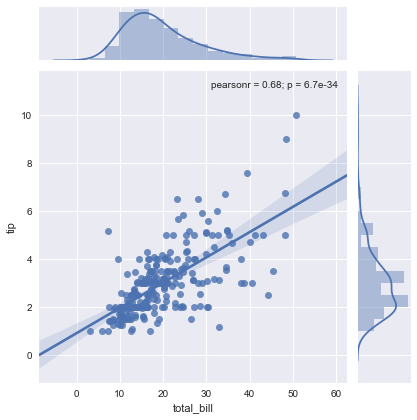

In [90]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

Using the **`pairplot`** function with ``kind="reg"`` combines **`regplot`** and **`PairGrid`** to show the linear relationship between variables in a dataset. Take care to note how this is different from **`lmplot`**. In the figure below, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, **`PairGrid`** is used to show multiple relationships between different pairings of the variables in a dataset:

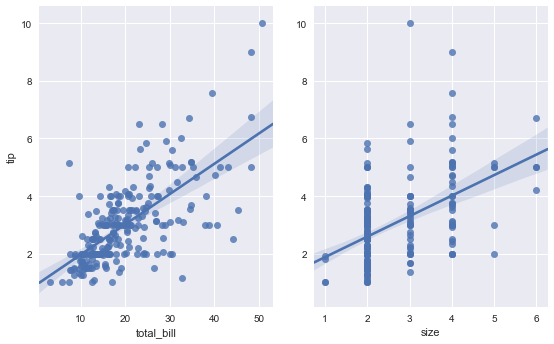

In [91]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

Like **`lmplot`**, but unlike **`jointplot`**, conditioning on an additional categorical variable is built into **`pairplot`** using the ``hue`` parameter:

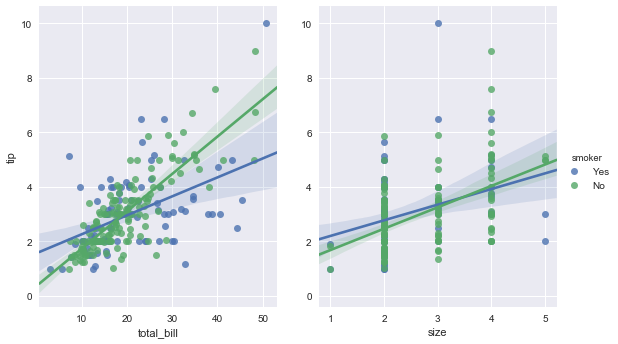

In [92]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

# Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions **swarmplot** and **stripplot**, the second includes **boxplot** and **violinplot**, and the third includes **barplot** and **pointplot**. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between **regplot** and **lmplot**, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level **factorplot**, which combines these functions with a **FacetGrid** to apply a categorical plot across a grid of figure panels.


In [93]:
%matplotlib inline

In [94]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [95]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [96]:
np.random.seed(sum(map(ord, "categorical")))

In [97]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Categorical scatterplots
------------------------

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses ***`stripplot`, which generalizes a scatterplot to the case where one of the variables is categorical:

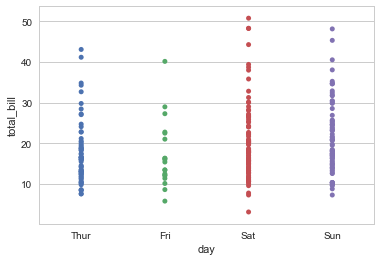

In [98]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter": 

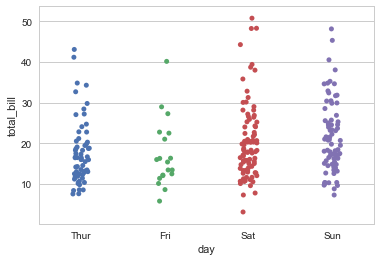

In [99]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

A different approach would be to use the function ***`swarmplot`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

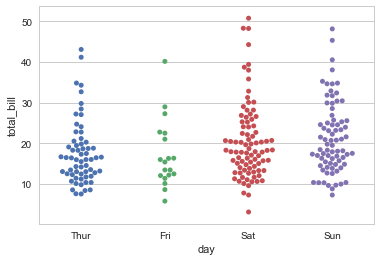

In [100]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

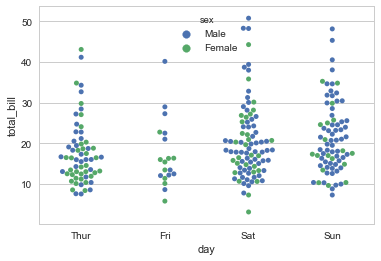

In [101]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas ``Categorical`` datatype, then the default order of the categories can be set there. For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted:

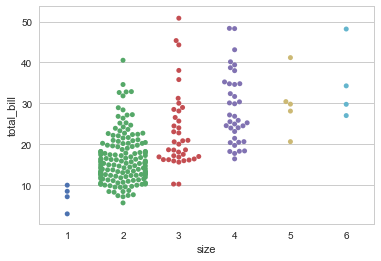

In [102]:
sns.swarmplot(x="size", y="total_bill", data=tips);

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). You can force an orientation using the ``orient`` keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to ``x`` and/or ``y``:

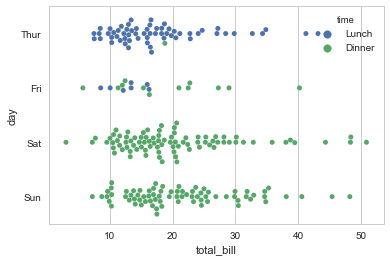

In [103]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

Distributions of observations within categories
-----------------------------------------------

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

Boxplots
^^^^^^^^

The first is the familiar ***`boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

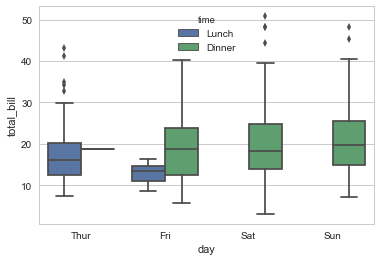

In [104]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

For boxplots, the assumption when using a ``hue`` variable is that it is nested within the ``x`` or ``y`` variable. This means that by default, the boxes for different levels of ``hue`` will be offset, as you can see above. If your ``hue`` variable is not nested, you can set the ``dodge`` parameter to disable offsetting:

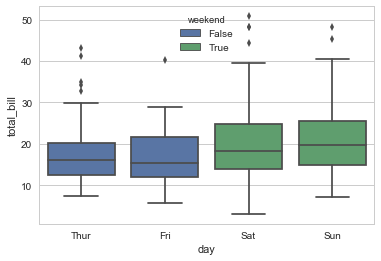

In [105]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

Violinplots
^^^^^^^^^^^

A different approach is a ***`violinplot`, which combines a boxplot with the kernel density estimation procedure described in the :ref:`distributions <distribution_tutorial>` tutorial:

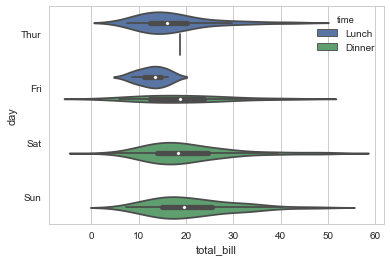

In [106]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

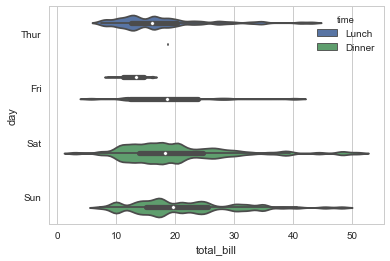

In [107]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

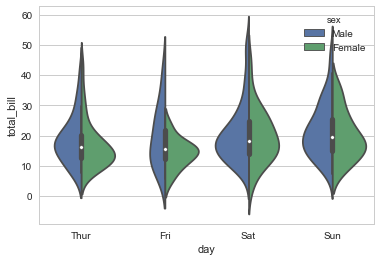

In [108]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

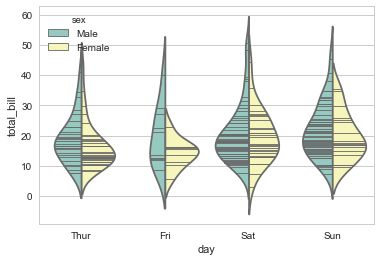

In [109]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

It can also be useful to combine ***`swarmplot` or ***`swarmplot` with ***`violinplot` or ***`boxplot` to show each observation along with a summary of the distribution:

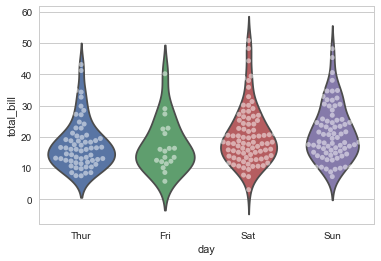

In [110]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

Statistical estimation within categories
----------------------------------------

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

Bar plots
----------

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the ***`barplot`*** function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

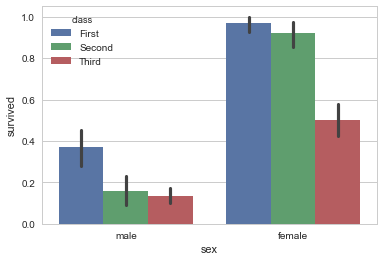

In [111]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the ***`countplot` function:

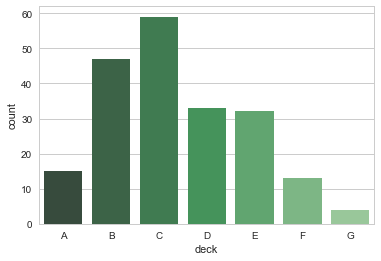

In [112]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

Both ***`barplot`*** and ***`countplot`*** can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

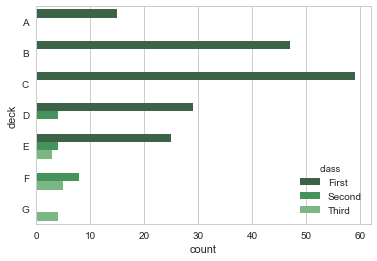

In [113]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

Point plots
------------

An alternative style for visualizing the same information is offered by the ***`pointplot`*** function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

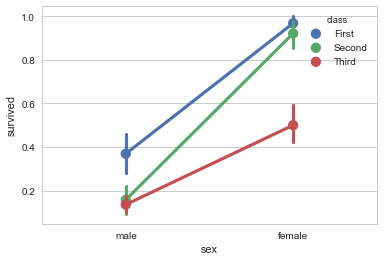

In [114]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the ``hue`` category:

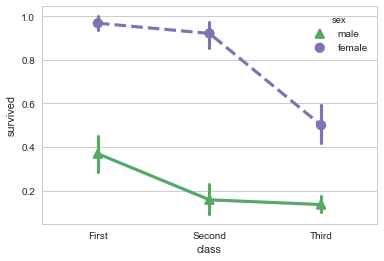

In [115]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

Plotting "wide-form" data
-------------------------

While using "long-form" or "tidy" data is preferred, these functions can also by applied to "wide-form" data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the ``data`` parameter:

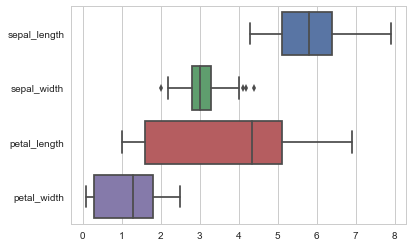

In [116]:
sns.boxplot(data=iris, orient="h");

Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a ``DataFrame``:

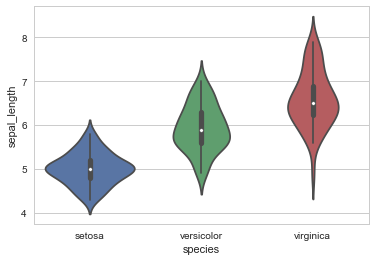

In [117]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

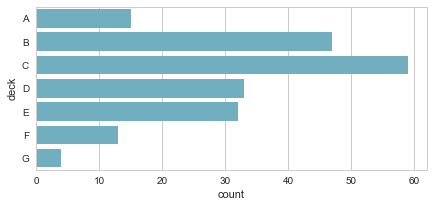

In [118]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

Drawing multi-panel categorical plots
-------------------------------------

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function ***`factorplot`***, which combines these functions with a ***`FacetGrid`*** to add the ability to examine additional categories through the larger structure of the figure. By default, ***`factorplot`*** produces a ***`pointplot`***:

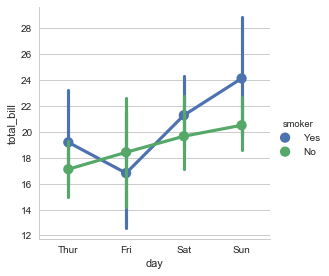

In [119]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

However, the ``kind`` parameter lets you chose any of the kinds of plots discussed above:

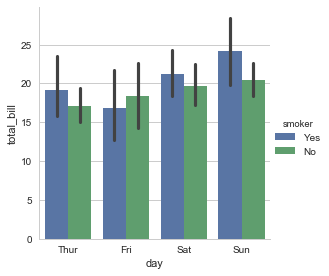

In [120]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

The main advantage of using a ***`factorplot`*** is that it is very easy to "facet" the plot and investigate the role of other categorical variables:

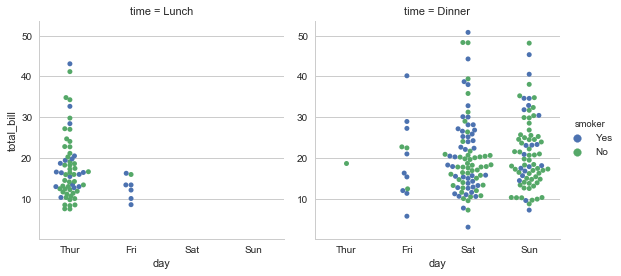

In [121]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

Any kind of plot can be drawn. Because of the way :class:`FacetGrid` works, to change the size and shape of the figure you need to specify the ``size`` and ``aspect`` arguments, which apply to each facet:

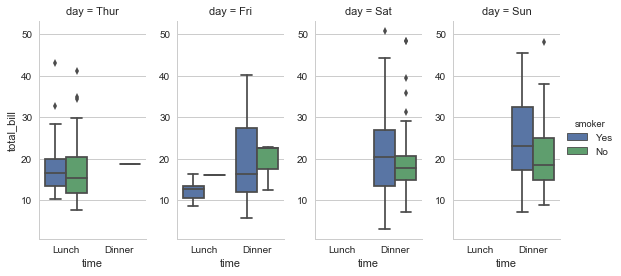

In [122]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

It is important to note that you could also make this plot by using ***`boxplot`*** and :class:`FacetGrid` directly. However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a ``Categorical`` datatype or by passing ``order`` and ``hue_order``.

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a :class:`PairGrid` to show categorical relationships across several different variables:

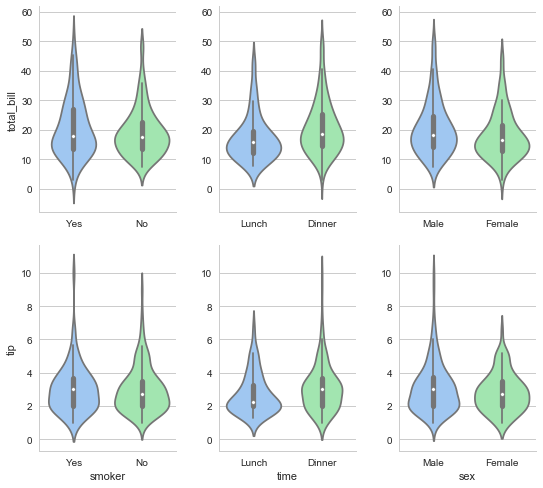

In [123]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

In [124]:
# For the above plots, they consist of multiple planels of 'Violin Plots" (as since a 'Pair Plot' type of function is being 
# called.  These are good for showing and comparing trends for data that are in non-numerical categories with each other.
#
# A 'Violin Plot' contains a box plot in the middle and on it also shows a Kernel density
# estimation plot on both sides of the box plot to show trends were observations are more frequent 
# (as a smooth approximate trend line).  As the data set being used is the "tips" dataset, the Pair Grid function is being used 
# so that multiple factors can be plotted in pairs amongst each other for the three categories ('Smoker', 'Time' and 'Sex') for
# the observed occurrences of the data for 'Tip' and 'Total Bill' in relation to the three categories.
#
